# Mushroom classifier Exploratory Data Analysis

#### Attribute Information: (classes: edible=e, poisonous=p)

#### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#### bruises: bruises=t,no=f

#### odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

#### gill-attachment: attached=a,descending=d,free=f,notched=n

#### gill-spacing: close=c,crowded=w,distant=d

#### gill-size: broad=b,narrow=n

#### gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

#### stalk-shape: enlarging=e,tapering=t

#### stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

#### stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

#### stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

#### stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#### stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#### veil-type: partial=p,universal=u

#### veil-color: brown=n,orange=o,white=w,yellow=y

#### ring-number: none=n,one=o,two=t

#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

#### population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

#### habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d 

### Basic libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

### loading dataset into df variable

In [3]:
df = pd.read_csv("E:/Mushroom classifier/notebook/data/mushrooms.csv")

### shape of dataset

In [4]:
print("Number of rows & columns in mushroom dataset: ", df.shape)

Number of rows & columns in mushroom dataset:  (8124, 23)


### sample of dataset 

In [5]:
print("sample from dataset: ")
df.head()

sample from dataset: 


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Columns present in dataset

In [6]:
print("Name of columns in dataset: ")
for i in range(len(df.columns)):
    print(i+1, df.columns[i])

Name of columns in dataset: 
1 class
2 cap-shape
3 cap-surface
4 cap-color
5 bruises
6 odor
7 gill-attachment
8 gill-spacing
9 gill-size
10 gill-color
11 stalk-shape
12 stalk-root
13 stalk-surface-above-ring
14 stalk-surface-below-ring
15 stalk-color-above-ring
16 stalk-color-below-ring
17 veil-type
18 veil-color
19 ring-number
20 ring-type
21 spore-print-color
22 population
23 habitat


### Some basic info about dataset like datatype, null entries & memory usage

In [7]:
print("basic information about dataset: ")
df.info()

basic information about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   ob

### Total unique categories in each columns

In [8]:
print("Unique categories in each column: \n")
for i in df.columns:
    print(i,":",df[i].unique())

Unique categories in each column: 

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


### Count of each category in each columns

In [9]:
print("Total count of each categories in each column: \n")
for i in df.columns:
    print("counts in",i,":",)
    print(df[i].value_counts(),"\n")

Total count of each categories in each column: 

counts in class :
e    4208
p    3916
Name: class, dtype: int64 

counts in cap-shape :
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

counts in cap-surface :
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

counts in cap-color :
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

counts in bruises :
f    4748
t    3376
Name: bruises, dtype: int64 

counts in odor :
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 

counts in gill-attachment :
f    7914
a     210
Name: gill-attachment, dtype: int64 

counts in gill-spacing :
c    6812
w    1312
Name: gill-spacing, dtype: int64 

counts in gill-size :
b    5612
n    2512
Name: gill-size, dtype: int64 

counts in gill-color :
b    1728
p    1492
w    1202
n    1048
g     752
h 

### Target column

In [10]:
print("Target column: ")
df['class']

Target column: 


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

#### here we have two categories in target column which is:
#### e & p
#### e => edible
#### p => poisness
#### now we encode these two categories into numerical values 0 & 1
#### e = 0
#### p = 1

In [11]:
Oencoder = OrdinalEncoder()

In [12]:
df.shape

(8124, 23)

### Null entries Treatment

In [13]:
print('Null entries in columns: ')
df.isnull().sum()

Null entries in columns: 


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### here we can see that there is no null entries

### Data Visulization

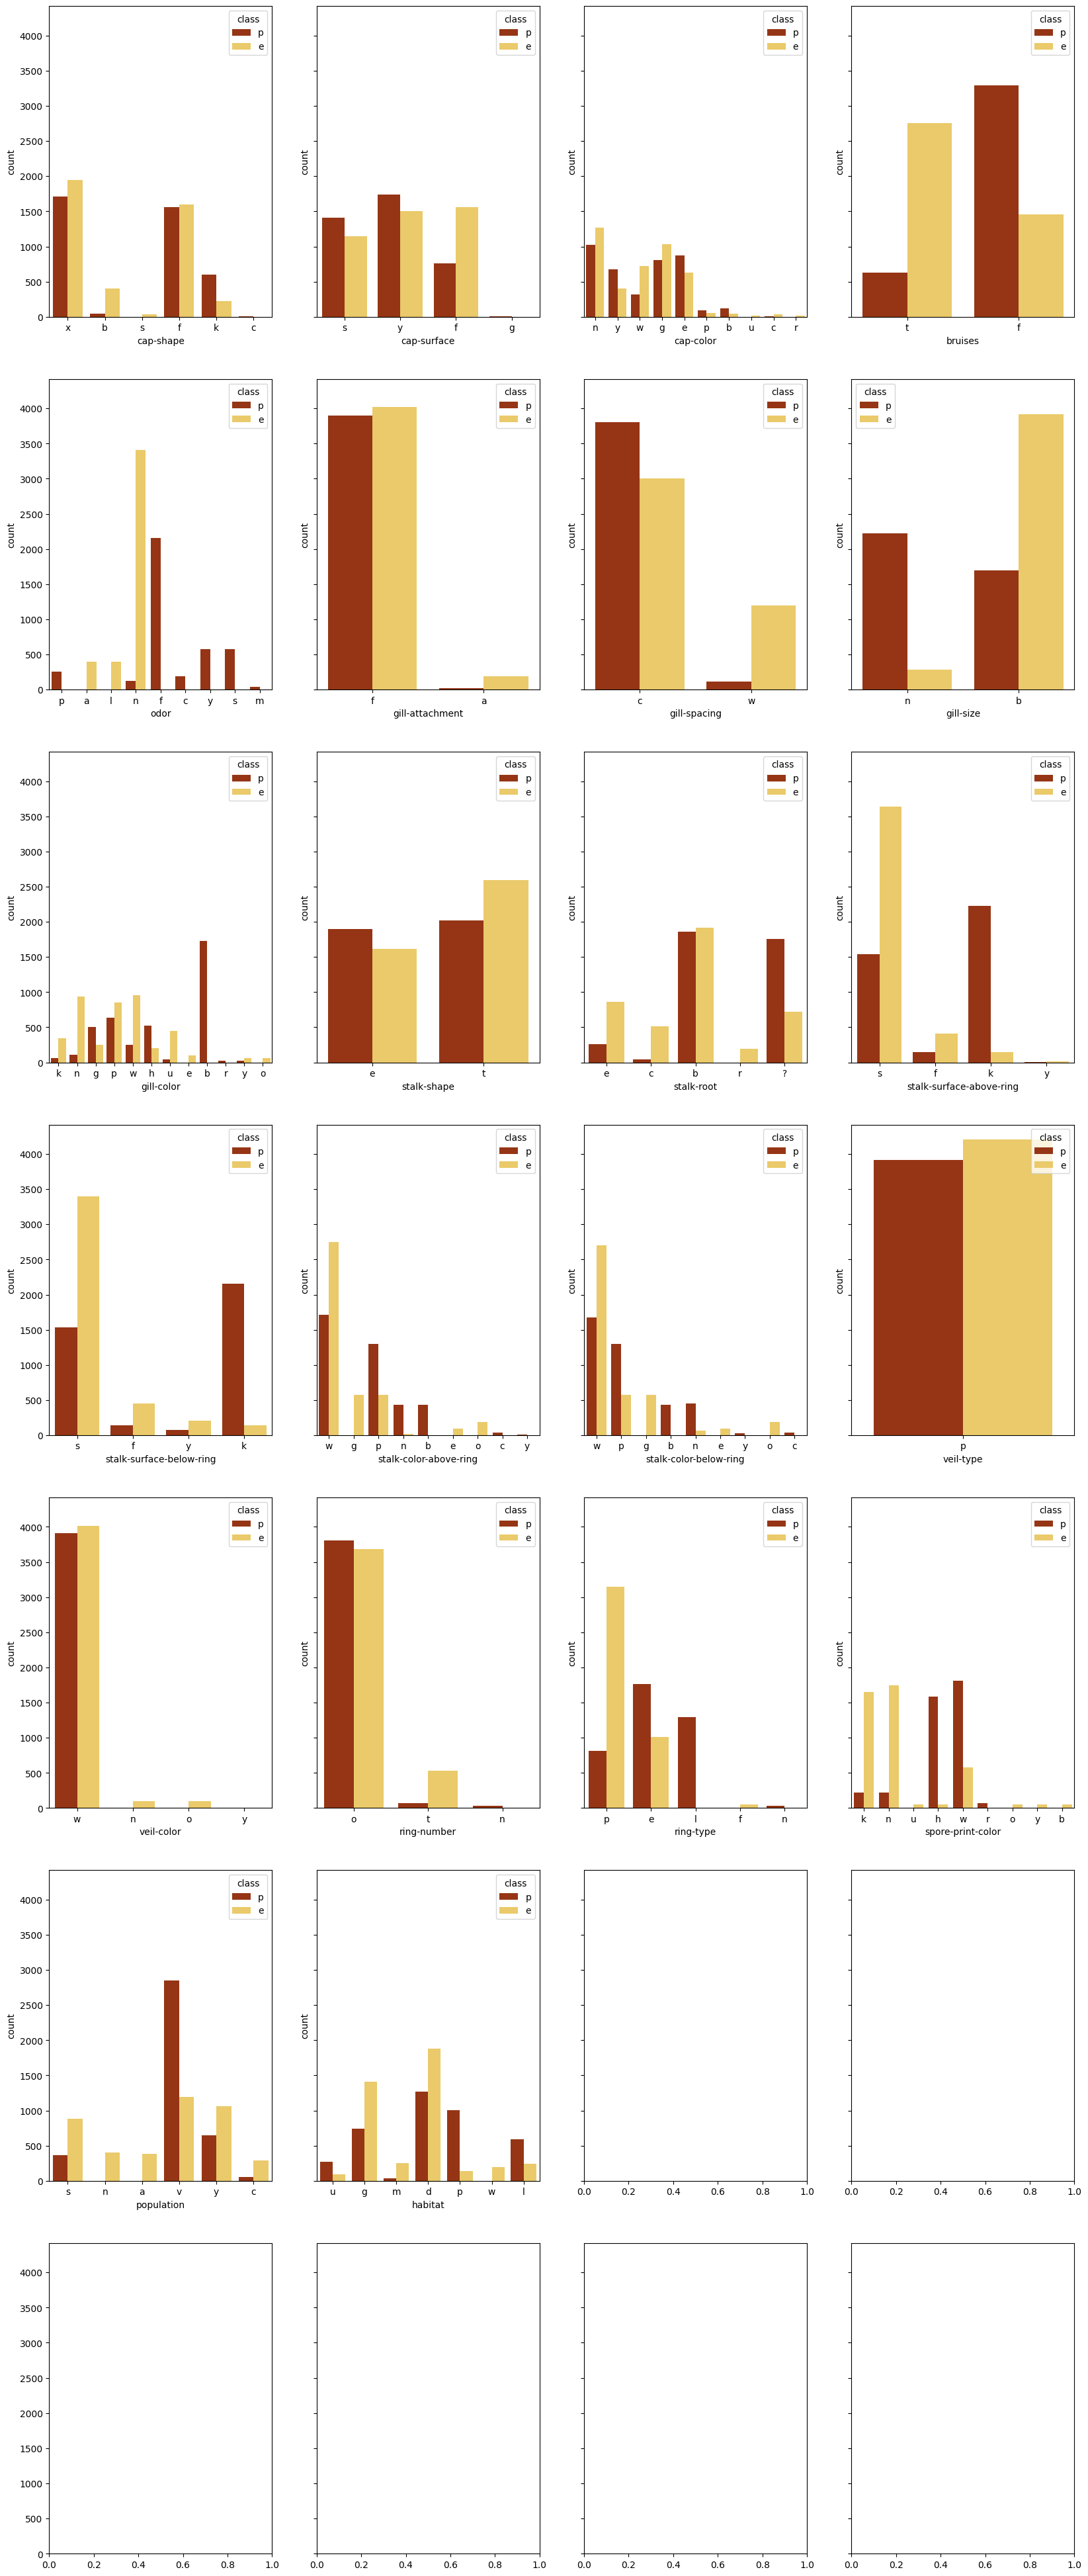

In [14]:
fig, axes = plt.subplots(nrows=7,ncols=4, figsize=(20,50),sharey=True)
idx = 0
for col in df.columns[1:]:
    sns.countplot(data=df,x=col, hue='class' ,ax=axes[idx//4][idx%4], palette='afmhot')
    idx += 1

#### by seeing above graphs we can extract some results that which category of a particular column has more poisnos.